
# Python Ecosystem - Working with data files - Numpy & Pandas




Author: Prof. Manoel Gadi

Contact: mfalonso@faculty.ie.edu

Teaching Web: http://mfalonso.pythonanywhere.com

Last revision: 26/Jan/2022

## Part 2: Working with Data Frames to calculate Market Beta


<img src="BetaCalculation.png" align="center">




* Referencia 1: http://gouthamanbalaraman.com/blog/calculating-stock-beta.html
* Referencia 2: http://www.investopedia.com/ask/answers/070615/what-formula-calculating-beta.asp

In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install pandas_datareader
!pip install yfinance

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [37]:
CCI30 = pd.read_csv('datasets/cci30_OHLCV.csv', index_col=0)
CCI30.index = pd.to_datetime(CCI30.index)
CCI30


,Open,High,Low,Close,Volume
Date,,,,,
2022-02-16,17515.5000,18150.2000,17094.9000,17888.3000,5.895838e+10
2022-02-15,16839.1000,18088.8000,16785.3000,18003.8000,6.016310e+10
2022-02-14,16720.3000,17041.2000,16297.5000,16838.8000,6.134623e+10
2022-02-13,16862.4000,17238.9000,16486.1000,16734.4000,5.193749e+10
2022-02-12,16804.6000,17280.8000,16429.2000,16865.5000,5.074447e+10
...,...,...,...,...,...
2015-01-05,82.3484,88.3190,81.5787,86.2289,0.000000e+00
2015-01-04,89.2479,91.1656,79.8710,82.2132,0.000000e+00
2015-01-03,100.2530,101.5400,88.7442,89.3769,0.000000e+00


In [5]:
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [6]:
import datetime

### Downloading historical data

Capturing 5-year historical series data for the Telefónica share (TEF.MC) and for the IBEX 35 index

In [7]:
fecha_final =   datetime.datetime(2021,12, 31, 0, 0, 0, 0)
fecha_inicial = fecha_final - datetime.timedelta(days=5*365)

In [8]:
df = pdr.get_data_yahoo("SPY", start=fecha_inicial, end=fecha_final)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,202.856567,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,204.063385,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,203.901245,78379000
2017-01-06,226.529999,227.750000,225.899994,227.210007,204.630753,71559900
2017-01-09,226.910004,227.070007,226.419998,226.460007,203.955307,46939700
...,...,...,...,...,...,...
2021-12-23,468.750000,472.190002,468.640015,470.600006,463.087189,56439700
2021-12-27,472.059998,477.309998,472.010010,477.260010,469.640869,56808600
2021-12-28,477.720001,478.809998,476.059998,476.869995,469.257080,47274600


In [9]:
fecha_final, fecha_inicial

(datetime.datetime(2021, 12, 31, 0, 0), datetime.datetime(2017, 1, 1, 0, 0))

In [10]:
ticker_symbol = 'ETH-USD'    #'TEF.MC'
ref_index =  'BTC-USD'                #'^IBEX'

ticker_symbol, ref_index

('ETH-USD', 'BTC-USD')

Reading data via the API wrapper Pandas Data Reader from https://finance.yahoo.com/

In [11]:
df_stock = pdr.get_data_yahoo(ticker_symbol, start=fecha_inicial, end=fecha_final)

[*********************100%***********************]  1 of 1 completed


In [12]:
df_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


Doing the same for the benchmark

In [13]:
# df_index = pdr.get_data_yahoo(ref_index, start=fecha_inicial, end=fecha_final)

In [14]:
# df_index.head()

### To calculate Beta we need to create a time series of monthly data points

In [15]:
df_stock = df_stock.resample('M').last()

In [16]:
df_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-30,431.214996,465.497009,401.243011,447.114014,447.114014,1903040000
2017-12-31,712.211975,760.348022,710.119019,756.732971,756.732971,2554269952
2018-01-31,1071.089966,1128.660034,1034.500000,1118.310059,1118.310059,3757560064
2018-02-28,877.934021,890.107971,855.124023,855.198975,855.198975,1963980032
2018-03-31,395.003998,418.467987,392.953003,396.457001,396.457001,1323920000


Doing the same for the benchmark

In [17]:
# df_index = df_index.resample('M').last()
CCI30 = CCI30.resample('M').last()

In [18]:
CCI30.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-31,69.2036,72.4130,66.5724,67.3085,0.0
2015-02-28,73.2336,74.2414,70.9221,72.9642,0.0
2015-03-31,64.6089,67.1880,61.9628,63.5306,0.0
2015-04-30,66.7237,70.5503,65.8189,69.4152,0.0
2015-05-31,77.9418,83.6798,74.7192,75.9582,0.0


### To calculate the Beta we use the percentage variation month to month, not the value of the stock directly

In [19]:
df_stock['returns'] = df_stock['Adj Close']/ df_stock['Adj Close'].shift(1) -1

In [20]:
df_stock['returns'].head()

Date
2017-11-30         NaN
2017-12-31    0.692483
2018-01-31    0.477813
2018-02-28   -0.235276
2018-03-31   -0.536415
Freq: M, Name: returns, dtype: float64

In [21]:
df_stock = df_stock.dropna()

In [22]:
df_stock['returns'].head()

Date
2017-12-31    0.692483
2018-01-31    0.477813
2018-02-28   -0.235276
2018-03-31   -0.536415
2018-04-30    0.689777
Freq: M, Name: returns, dtype: float64

In [23]:
df_stock.head()

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2017-12-31,712.211975,760.348022,710.119019,756.732971,756.732971,2554269952,0.692483
2018-01-31,1071.089966,1128.660034,1034.500000,1118.310059,1118.310059,3757560064,0.477813
2018-02-28,877.934021,890.107971,855.124023,855.198975,855.198975,1963980032,-0.235276
2018-03-31,395.003998,418.467987,392.953003,396.457001,396.457001,1323920000,-0.536415
2018-04-30,689.760986,694.439026,666.117004,669.924011,669.924011,2853100032,0.689777


Doing the same for the benchmark

In [24]:
df_index = CCI30
#  Switched to normal close pay attention
df_index['returns'] = df_index['Close']/ df_index['Close'].shift(1) -1
df_index = df_index.dropna()


In [25]:
df_index.tail()

,Open,High,Low,Close,Volume,returns
Date,,,,,,
2021-10-31,26032.8,26737.8,25159.4,26109.5,8.782840e+10,0.259448
2021-11-30,25005.4,26209.2,24260.6,25253.3,4.294800e+10,-0.032793
2021-12-31,21466.7,22159.9,20798.3,21233.1,4.190034e+10,-0.159195
2022-01-31,15261.3,15812.0,14663.3,15681.4,6.222856e+10,-0.261464
2022-02-28,17515.5,18150.2,17094.9,17888.3,5.895838e+10,0.140734


### Merging the 2 dataframes by date (the dataframe's index is the date) and taking only the stock_returns and index_returns columns

In [26]:
import pandas as pd

In [27]:
df = pd.DataFrame({'stock_returns' : df_stock['returns'],
                        'index_returns' : df_index['returns']},
                        index=df_stock.index)

In [28]:
df.tail()

,stock_returns,index_returns
Date,,
2021-08-31,0.353883,0.345245
2021-09-30,-0.125826,-0.123248
2021-10-31,0.428559,0.259448
2021-11-30,0.080084,-0.032793
2021-12-31,-0.198128,-0.159195


For safety we delete the rows that do not have the 2 values in case there are.

In [29]:
df = df.dropna()

In [30]:
df.head()

,stock_returns,index_returns
Date,,
2017-12-31,0.692483,1.438946
2018-01-31,0.477813,-0.166225
2018-02-28,-0.235276,-0.189116
2018-03-31,-0.536415,-0.424873
2018-04-30,0.689777,0.731018


#### Implementing the function for covariance

Reference: http://ci.columbia.edu/ci/premba_test/c0331/s7/s7_5.html

In [31]:
def covariance(a, b):
    if len(a) != len(b):
        return
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    sum = 0
    for i in range(0, len(a)):
        sum += ((a[i] - a_mean) * (b[i] - b_mean))
    return sum/(len(a)-1)

Miremos otra vez a la formula de la Beta:
    
<img src="img/BetaCalculation.png" width=500 height=500 align="center">

In [32]:
numerator = covariance(df['stock_returns'],df['index_returns'])
print("COVARIANCE(stock, benchmark) = COVARIANCE("
      +ticker_symbol+", "+ref_index +") = " +str(numerator))

COVARIANCE(stock, benchmark) = COVARIANCE(ETH-USD, BTC-USD) = 0.08914590457687373


In [33]:
denominator = covariance(df['index_returns'],df['index_returns'])
print("VARIANCE(benchmark) = COVARIANCE(benchmark, benchmark) = COVARIANCE("
      +ref_index+", "+ref_index +") = " +str(denominator))


VARIANCE(benchmark) = COVARIANCE(benchmark, benchmark) = COVARIANCE(BTC-USD, BTC-USD) = 0.11178283606411131


In [34]:
# BETA = Covariance (stock,index) / Variance (Index) = Covariance (stock,index) / Covariance (stock,stock)
print("BETA = COVARIANCE(stock, benchmark) / VARIANCE(benchmark) = " 
      + str(numerator) + " / " + str(denominator) + " = " 
      +str(covariance(df['stock_returns'],df['index_returns'])
           /covariance(df['index_returns'],df['index_returns'])))

BETA = COVARIANCE(stock, benchmark) / VARIANCE(benchmark) = 0.08914590457687373 / 0.11178283606411131 = 0.7974918844047353


# Everything in one function:

In [35]:
import datetime
end_date =   datetime.datetime(2022,2, 12, 0, 0, 0, 0)
start_date = end_date - datetime.timedelta(days=5*365)

In [36]:
#!pip install yfinance
#!pip install --upgrade pandas
#!pip install --upgrade pandas-datareader

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [39]:
import datetime
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

### this function isn't so good


CCI30 = pd.read_csv('datasets/cci30_OHLCV.csv', index_col=0)
CCI30.index = pd.to_datetime(CCI30.index)

def covariance(a, b):
    if len(a) != len(b):
        return
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    sum = 0
    for i in range(0, len(a)):
        sum += ((a[i] - a_mean) * (b[i] - b_mean))
    return sum/(len(a)-1)



def calculate_beta(ticker_symbol, reference_index, start_date, end_date):
    """ Monthly Beta calculation using historical series data for the ticker_symbol stock and 
    the reference_index for the periob between start_date and end_date """
    df_stock = pdr.get_data_yahoo(ticker_symbol, start=start_date, end=end_date)
    df_index = CCI30
    df_stock = df_stock.resample('M').last()
    df_index = df_index.resample('M').last()
    df_stock['returns'] = df_stock['Adj Close']/ df_stock['Adj Close'].shift(1) -1
    df_stock = df_stock.dropna()
    df_index['returns'] = df_index['Close']/ df_index['Close'].shift(1) -1
    df_index = df_index.dropna()
    df = pd.DataFrame({'stock_returns' : df_stock['returns'],
                            'index_returns' : df_index['returns']},
                            index=df_stock.index)
    df = df.dropna()


    numerator = covariance(df['stock_returns'],df['index_returns'])
    denominator = covariance(df['index_returns'],df['index_returns'])
    beta = numerator/denominator
    return {'sotck': ticker_symbol, 'reference_index': 'CCI30', 'beta': beta}

In [40]:
crypto_list = ["BTC-USD",
              "ETH-USD",
              "BNB-USD",
              "XRP-USD",
              "ADA-USD",
              "SOL-USD",
              "LUNA1-USD",
              "AVAX-USD",
              "MATIC-USD",
              "LTC-USD",
              "ATOM-USD",
              "LINK-USD",
              "DOT-USD",
              "CRO-USD",
              "LINK-USD",
              "NEAR-USD",
              "UNI1-USD",
              "TRX-USD",
              "FTT-USD",
              "ALGO-USD",
              "XLM-USD",
              "MANA-USD",
              "FTM-USD",
              "SAND-USD",
              "HBAR-USD",
              "EGLD-USD",
               "VET-USD",
               "AXS-USD",
               "FIL-USD",
              


              
]

In [41]:
final_df = []
for i in crypto_list:
  final_df.append(calculate_beta(i, 'CCI30', start_date, end_date))


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [42]:
betas_df = pd.DataFrame(final_df)
betas_df['beta'].describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9])

count    29.000000
mean      1.651643
std       0.950641
min       0.506748
10%       0.870875
20%       0.962401
30%       1.117626
40%       1.305988
50%       1.473584
60%       1.613487
70%       1.845611
80%       2.261023
90%       2.490963
max       5.453499
Name: beta, dtype: float64

C:\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


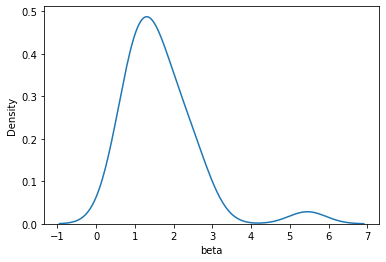

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(betas_df['beta'])
plt.show()


In [44]:
betas_df.head()

,sotck,reference_index,beta
0,BTC-USD,CCI30,0.506748
1,ETH-USD,CCI30,0.802784
2,BNB-USD,CCI30,1.600632
3,XRP-USD,CCI30,2.816550
4,ADA-USD,CCI30,2.214094


In [45]:
def get_stcoks_for_beta_range(min_beta, max_beta):
  beta_df_temp = betas_df[(betas_df['beta']>=min_beta)&(betas_df['beta']<=max_beta)]
  return beta_df_temp

In [46]:
beta_until_1_2 = get_stcoks_for_beta_range(0, 1.2)
beta_until_1_2['sotck'].unique().tolist()


['BTC-USD',
 'ETH-USD',
 'LTC-USD',
 'ATOM-USD',
 'CRO-USD',
 'NEAR-USD',
 'FTT-USD',
 'ALGO-USD',
 'HBAR-USD',
 'FIL-USD']

In [47]:
help(calculate_beta)

Help on function calculate_beta in module __main__:

calculate_beta(ticker_symbol, reference_index, start_date, end_date)
    Monthly Beta calculation using historical series data for the ticker_symbol stock and 
    the reference_index for the periob between start_date and end_date



In [48]:
final_df

[{'sotck': 'BTC-USD', 'reference_index': 'CCI30', 'beta': 0.5067479936191599},
 {'sotck': 'ETH-USD', 'reference_index': 'CCI30', 'beta': 0.802783756295934},
 {'sotck': 'BNB-USD', 'reference_index': 'CCI30', 'beta': 1.6006321426993828},
 {'sotck': 'XRP-USD', 'reference_index': 'CCI30', 'beta': 2.816550275037331},
 {'sotck': 'ADA-USD', 'reference_index': 'CCI30', 'beta': 2.214094388417558},
 {'sotck': 'SOL-USD', 'reference_index': 'CCI30', 'beta': 2.3436696700130644},
 {'sotck': 'LUNA1-USD',
  'reference_index': 'CCI30',
  'beta': 1.8757301598573914},
 {'sotck': 'AVAX-USD', 'reference_index': 'CCI30', 'beta': 1.6167011710416577},
 {'sotck': 'MATIC-USD',
  'reference_index': 'CCI30',
  'beta': 2.4653996501757307},
 {'sotck': 'LTC-USD', 'reference_index': 'CCI30', 'beta': 0.9019606201973563},
 {'sotck': 'ATOM-USD', 'reference_index': 'CCI30', 'beta': 0.8878984358487436},
 {'sotck': 'LINK-USD', 'reference_index': 'CCI30', 'beta': 1.3059876655533371},
 {'sotck': 'DOT-USD', 'reference_index':

In [49]:
import datetime
end_date =   datetime.datetime(2022,2, 12, 0, 0, 0, 0)
start_date = end_date - datetime.timedelta(days=5*365)

In [50]:
df_stock = pdr.get_data_yahoo('BTC-USD', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [51]:
df_stock.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-12,1003.520020,1004.760010,996.921021,999.181030,999.181030,67530000
2017-02-13,998.885010,1002.099976,976.002014,990.642029,990.642029,100607000
2017-02-14,991.734985,1011.510010,986.471008,1004.549988,1004.549988,137946000
2017-02-15,1006.210022,1008.840027,1001.580017,1007.479980,1007.479980,89759400
2017-02-16,1007.650024,1033.369995,1007.650024,1027.439941,1027.439941,122277000
2017-02-17,1026.119995,1053.170044,1025.640015,1046.209961,1046.209961,136474000
2017-02-18,1049.209961,1061.099976,1046.959961,1054.420044,1054.420044,99073504
2017-02-19,1054.760010,1056.810059,1043.459961,1047.869995,1047.869995,77423296
2017-02-20,1048.689941,1080.489990,1041.689941,1079.979980,1079.979980,109478000


In [54]:
df_stock['Close'].pct_change().std()

0.041699756478167496

In [55]:
from datetime import timedelta
def calculate_volatility_per_stock(list_of_stock_in_index):
  output_df = []
  for stock in list_of_stock_in_index:
      df_stock = pdr.get_data_yahoo(stock, start=end_date-timedelta(days=30), end=end_date)
#      std_of_stock = df_stock['Close'].std() # FIX RETURN HERE
      std_of_stock = df_stock['Close'].pct_change().std() # FIXED WITH RETURN!

      log_of_stock_std = np.log(std_of_stock)
      output_df.append({'stock': stock, 'std_as_volatility': max(0,log_of_stock_std)})
  return pd.DataFrame(output_df)


def get_stock_weigthing_based_on_volatility(df_of_volatilities):
  sum_of_volatility = df_of_volatilities['std_as_volatility'].sum()
  df_of_volatilities['volatilityOutOfTotal'] = df_of_volatilities['std_as_volatility'] / sum_of_volatility
  df_of_volatilities['not_final_weight'] = 1 - df_of_volatilities['volatilityOutOfTotal']
  df_of_volatilities['final_weight'] = df_of_volatilities['not_final_weight'] / df_of_volatilities['not_final_weight'].sum()
  return df_of_volatilities


In [56]:
list_of_stocks = crypto_list[:5]
vol_df = calculate_volatility_per_stock(list_of_stocks)
vol_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,stock,std_as_volatility
0,BTC-USD,0
1,ETH-USD,0
2,BNB-USD,0
3,XRP-USD,0
4,ADA-USD,0


In [57]:
vold_df = get_stock_weigthing_based_on_volatility(vol_df)
vold_df.head(10)

,stock,std_as_volatility,volatilityOutOfTotal,not_final_weight,final_weight
0,BTC-USD,0,NaN,NaN,NaN
1,ETH-USD,0,NaN,NaN,NaN
2,BNB-USD,0,NaN,NaN,NaN
3,XRP-USD,0,NaN,NaN,NaN
4,ADA-USD,0,NaN,NaN,NaN


IMPORT LIST OF TOP 200 CRYPTOS TO THEN FILTER BY TRADING VOLUME (TOP 25TH PERCENTILE)

In [59]:
top200_df = pd.read_excel('dataset/Top 200 cryptos (by Market Cap).xlsx', index_col=0)
#top200_df.index = pd.to_datetime(top200_df.index)
top200_df

,Name,Price,Market Cap,Volume(24h)
Rank,,,,
1.0,NaN,35678.4200,6.778563e+11,40964636287
NaN,Bitcoin,NaN,NaN,"1,146,237 BTC"
NaN,BTC,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN
2.0,NaN,2446.4100,2.928334e+11,24419180925
...,...,...,...,...
NaN,Mdex,NaN,NaN,"54,565,051 MDX"
NaN,MDX,NaN,NaN,NaN
200.0,NaN,0.4536,1.765466e+08,2108928


In [60]:
top200_df.iloc[::4,:]

,Name,Price,Market Cap,Volume(24h)
Rank,,,,
1.0,NaN,35678.420,6.778563e+11,40964636287
2.0,NaN,2446.410,2.928334e+11,24419180925
3.0,NaN,1.000,7.954243e+10,95053917880
NaN,BNB,NaN,NaN,"7,620,410 BNB"
NaN,USD Coin,NaN,NaN,"7,403,573,358 USDC"
...,...,...,...,...
NaN,MediBloc,NaN,NaN,"214,796,783 MED"
NaN,LSK,NaN,NaN,NaN
197.0,NaN,0.245,1.832759e+08,31420190


In [61]:
top200_df.columns
 

Index(['Name', 'Price', 'Market Cap', 'Volume(24h)'], dtype='object')

In [62]:
top200_df["Price"].notnull()

Rank
1.0       True
NaN      False
NaN      False
NaN      False
2.0       True
         ...  
NaN      False
NaN      False
200.0     True
NaN      False
NaN      False
Name: Price, Length: 608, dtype: bool

In [63]:
  values_df = top200_df[top200_df["Price"].notnull()].reset_index()
  values_df

,Rank,Name,Price,Market Cap,Volume(24h)
0,1.0,NaN,35678.42000,6.778563e+11,40964636287
1,2.0,NaN,2446.41000,2.928334e+11,24419180925
2,3.0,NaN,1.00000,7.954243e+10,95053917880
3,4.0,NaN,342.04000,5.658012e+10,2611265562
4,5.0,NaN,1.00000,5.305233e+10,7404386033
...,...,...,...,...,...
195,196.0,NaN,2.33000,1.864749e+08,81929802
196,197.0,NaN,0.24500,1.832759e+08,31420190
197,198.0,NaN,0.04422,1.799899e+08,63649526
198,199.0,NaN,0.20760,1.784649e+08,11346026


In [64]:
index_of_names = np.where(top200_df['Price'].isnull() == False)[0] +2
index_of_names

array([  2,   6,  10,  13,  17,  20,  23,  27,  30,  34,  37,  41,  44,
        47,  50,  54,  58,  61,  64,  67,  70,  73,  76,  79,  82,  85,
        88,  91,  94,  97, 100, 103, 106, 109, 112, 115, 118, 121, 124,
       127, 130, 133, 136, 139, 142, 145, 148, 151, 154, 157, 160, 163,
       166, 169, 172, 175, 178, 181, 184, 187, 190, 193, 196, 199, 202,
       205, 208, 211, 214, 217, 220, 223, 226, 229, 232, 235, 238, 241,
       244, 247, 250, 253, 256, 259, 262, 265, 268, 271, 274, 277, 280,
       283, 286, 289, 292, 295, 298, 301, 304, 307, 310, 313, 316, 319,
       322, 325, 328, 331, 334, 337, 340, 343, 346, 349, 352, 355, 358,
       361, 364, 367, 370, 373, 376, 379, 382, 385, 388, 391, 394, 397,
       400, 403, 406, 409, 412, 415, 418, 421, 424, 427, 430, 433, 436,
       439, 442, 445, 448, 451, 454, 457, 460, 463, 466, 469, 472, 475,
       478, 481, 484, 487, 490, 493, 496, 499, 502, 505, 508, 511, 514,
       517, 520, 523, 526, 529, 532, 535, 538, 541, 544, 547, 55

In [65]:
crypto_names =top200_df.iloc[index_of_names,0].reset_index()
crypto_names

,Rank,Name
0,NaN,BTC
1,NaN,ETH
2,NaN,USDT
3,NaN,BNB
4,NaN,USDC
...,...,...
195,NaN,MBOX
196,NaN,FET
197,NaN,ACH
198,NaN,MDX


In [66]:
new_df = pd.concat([crypto_names, values_df], axis= 1)
new_df

,Rank,Name,Rank,Name,Price,Market Cap,Volume(24h)
0,NaN,BTC,1.0,NaN,35678.42000,6.778563e+11,40964636287
1,NaN,ETH,2.0,NaN,2446.41000,2.928334e+11,24419180925
2,NaN,USDT,3.0,NaN,1.00000,7.954243e+10,95053917880
3,NaN,BNB,4.0,NaN,342.04000,5.658012e+10,2611265562
4,NaN,USDC,5.0,NaN,1.00000,5.305233e+10,7404386033
...,...,...,...,...,...,...,...
195,NaN,MBOX,196.0,NaN,2.33000,1.864749e+08,81929802
196,NaN,FET,197.0,NaN,0.24500,1.832759e+08,31420190
197,NaN,ACH,198.0,NaN,0.04422,1.799899e+08,63649526
198,NaN,MDX,199.0,NaN,0.20760,1.784649e+08,11346026


In [67]:
pablo_df = new_df.iloc[:, [1,4,5,6] ]
pablo_df

,Name,Price,Market Cap,Volume(24h)
0,BTC,35678.42000,6.778563e+11,40964636287
1,ETH,2446.41000,2.928334e+11,24419180925
2,USDT,1.00000,7.954243e+10,95053917880
3,BNB,342.04000,5.658012e+10,2611265562
4,USDC,1.00000,5.305233e+10,7404386033
...,...,...,...,...
195,MBOX,2.33000,1.864749e+08,81929802
196,FET,0.24500,1.832759e+08,31420190
197,ACH,0.04422,1.799899e+08,63649526
198,MDX,0.20760,1.784649e+08,11346026


In [68]:
pablo_df.columns

Index(['Name', 'Price', 'Market Cap', 'Volume(24h)'], dtype='object')

In [69]:
pablo_df.columns.str.lower()

Index(['name', 'price', 'market cap', 'volume(24h)'], dtype='object')

In [70]:
pablo_df.columns = pablo_df.columns.str.lower().str.replace(" ", "_")

In [71]:
pablo_df.columns

Index(['name', 'price', 'market_cap', 'volume(24h)'], dtype='object')

In [72]:
final_df = pablo_df.rename(columns= {"volume(24h)": "daily_trading_volume"})

In [73]:
final_df.to_csv("datasets/clean_crypto_list.csv")

In [74]:
crypto_list_top_200 = pd.read_csv('datasets/clean_crypto_list.csv', index_col=0)
#top200_df.index = pd.to_datetime(top200_df.index)
crypto_list_top_200

,name,price,market_cap,daily_trading_volume
0,BTC,35678.42000,6.778563e+11,40964636287
1,ETH,2446.41000,2.928334e+11,24419180925
2,USDT,1.00000,7.954243e+10,95053917880
3,BNB,342.04000,5.658012e+10,2611265562
4,USDC,1.00000,5.305233e+10,7404386033
...,...,...,...,...
195,MBOX,2.33000,1.864749e+08,81929802
196,FET,0.24500,1.832759e+08,31420190
197,ACH,0.04422,1.799899e+08,63649526
198,MDX,0.20760,1.784649e+08,11346026


NOW WE CAN DO THE FILTER FOR THE TOP 25TH PERCENTILE BASED ON DAILY TRADING VOLUME

In [75]:
 dtv_threshold  =crypto_list_top_200.quantile(0.75)["daily_trading_volume"]

In [76]:
crypto_list_top_200["daily_trading_volume"] > dtv_threshold

0       True
1       True
2       True
3       True
4       True
       ...  
195    False
196    False
197    False
198    False
199    False
Name: daily_trading_volume, Length: 200, dtype: bool

In [77]:
filtered_df = crypto_list_top_200[crypto_list_top_200["daily_trading_volume"] > dtv_threshold].reset_index(drop = True)
filtered_df

,name,price,market_cap,daily_trading_volume
0,BTC,35678.420000,6.778563e+11,40964636287
1,ETH,2446.410000,2.928334e+11,24419180925
2,USDT,1.000000,7.954243e+10,95053917880
3,BNB,342.040000,5.658012e+10,2611265562
4,USDC,1.000000,5.305233e+10,7404386033
5,XRP,0.647000,3.108629e+10,4300113951
6,SOL,84.250000,2.706960e+10,4305710775
7,ADA,0.797100,2.690567e+10,3179807660
8,LUNA,56.690000,2.174330e+10,5169176737
9,BUSD,1.000000,1.832483e+10,7576501858


In [78]:
filtered_df.shape

(50, 4)

In [79]:
stock_names = filtered_df.name + "-USD"
import datetime

In [80]:
filtered_df.name + "-USD"

0       BTC-USD
1       ETH-USD
2      USDT-USD
3       BNB-USD
4      USDC-USD
5       XRP-USD
6       SOL-USD
7       ADA-USD
8      LUNA-USD
9      BUSD-USD
10     AVAX-USD
11     DOGE-USD
12      DOT-USD
13      UST-USD
14     SHIB-USD
15    MATIC-USD
16      DAI-USD
17     WBTC-USD
18      LTC-USD
19     ATOM-USD
20      TRX-USD
21     LINK-USD
22      UNI-USD
23      BCH-USD
24     NEAR-USD
25     ALGO-USD
26     MANA-USD
27      XLM-USD
28      FTM-USD
29      ETC-USD
30      ICP-USD
31     SAND-USD
32      FIL-USD
33     EGLD-USD
34      AXS-USD
35      VET-USD
36    THETA-USD
37      EOS-USD
38     AAVE-USD
39     GALA-USD
40      NEO-USD
41      ZEC-USD
42      ENJ-USD
43      OKB-USD
44    WAVES-USD
45      CRV-USD
46      LRC-USD
47     ROSE-USD
48     API3-USD
49    ALICE-USD
Name: name, dtype: object

In [81]:
filtered_df.drop([30, 39], axis = 0)

,name,price,market_cap,daily_trading_volume
0,BTC,35678.420000,6.778563e+11,40964636287
1,ETH,2446.410000,2.928334e+11,24419180925
2,USDT,1.000000,7.954243e+10,95053917880
3,BNB,342.040000,5.658012e+10,2611265562
4,USDC,1.000000,5.305233e+10,7404386033
5,XRP,0.647000,3.108629e+10,4300113951
6,SOL,84.250000,2.706960e+10,4305710775
7,ADA,0.797100,2.690567e+10,3179807660
8,LUNA,56.690000,2.174330e+10,5169176737
9,BUSD,1.000000,1.832483e+10,7576501858


In [83]:
#filtered_df["name"] = filtered_df.name + "-USD"
filtered_df.to_csv("datasets/list_of_constituents.csv")

In [84]:
end_date =   datetime.datetime(2022,3,1 , 0, 0, 0, 0)
start_date = end_date - datetime.timedelta(days=5*365)

In [85]:
import math

In [86]:
from datetime import timedelta

def making_std_bigger(std_input):
  if std_input > 1:
    return std_input 
  else:
    return math.sqrt(std_input)

def get_max_std(df_of_volatilities):
  max_stf_df = df_of_volatilities[df_of_volatilities['stock'].isin(['BTC-USD', 'ETH-USD', 'WBTC-USD'])].reset_index()
  return max_stf_df['std_as_volatility'].sum()


def calculate_volatility_per_stock(list_of_stock_in_index):
  output_df = []
  for stock in list_of_stock_in_index:
      df_stock = pdr.get_data_yahoo(stock, start=end_date-timedelta(days=30), end=end_date)
      std_of_stock = df_stock['Close'].std()
      #log_of_stock_std = np.log(std_of_stock) # WTF
      # output_df.append({'stock': stock, 'std_as_volatility': std_of_stock}) 
      output_df.append({'stock': stock, 'std_as_volatility': making_std_bigger(std_of_stock) })
  return pd.DataFrame(output_df)


def get_stock_weigthing_based_on_volatility(df_of_volatilities):

  sum_of_volatility = df_of_volatilities['std_as_volatility'].sum()
  sum_of_volatility_discard_max = sum_of_volatility - get_max_std(df_of_volatilities)
  def get_volatility_out_of_total(row):
    if row['stock'] not in ['BTC-USD', 'ETH-USD', 'WBTC-USD']:
      return row['std_as_volatility'] / sum_of_volatility_discard_max
    else:
      return row['std_as_volatility'] / sum_of_volatility
   
  df_of_volatilities['volatilityOutOfTotal'] = df_of_volatilities.apply(lambda x: get_volatility_out_of_total(x), axis = 1) 
  df_of_volatilities['not_final_weight'] = 1 - df_of_volatilities['volatilityOutOfTotal']
  df_of_volatilities['final_weight'] = df_of_volatilities['not_final_weight'] / df_of_volatilities['not_final_weight'].sum()
  return df_of_volatilities



In [87]:
volatility_df  =calculate_volatility_per_stock(stock_names)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [88]:
volatility_df.shape

(50, 2)

In [90]:
weights_df  =get_stock_weigthing_based_on_volatility(volatility_df) #normalize the volatility value instead of using the log (does not make sense to me) 
weights_df

,stock,std_as_volatility,volatilityOutOfTotal,not_final_weight,final_weight
0,BTC-USD,2546.095315,0.467971,0.532029,0.011077
1,ETH-USD,204.006810,0.037496,0.962504,0.020040
2,USDT-USD,0.010899,0.000071,0.999929,0.020820
3,BNB-USD,22.160667,0.143818,0.856182,0.017827
4,USDC-USD,0.018608,0.000121,0.999879,0.020819
5,XRP-USD,0.293554,0.001905,0.998095,0.020781
6,SOL-USD,9.999290,0.064893,0.935107,0.019470
7,ADA-USD,0.324995,0.002109,0.997891,0.020777
8,LUNA-USD,0.044291,0.000287,0.999713,0.020815
9,BUSD-USD,0.028868,0.000187,0.999813,0.020817


In [91]:
weights_df.dropna(inplace=True)


In [92]:
# start_date =   datetime.datetime(2021,1,1, 0, 0, 0, 0)
# end_date =  datetime.datetime(2022,1,1, 0, 0, 0, 0)

In [93]:
from datetime import timedelta
def get_price_per_date(stock, date): 
  df_res = pdr.get_data_yahoo(stock, start=date, end=date)
  df_res.reset_index(inplace=True)
  if type(df_res) == pd.DataFrame:
    if len(df_res) > 0:
      return {'open':df_res.at[0, 'Open'], 'close': df_res.at[0, 'Close']}
  else:
    return {}


def get_index_values_per_dates(start_date,  weights_df):
  weights_df['date_prices']  = weights_df.apply(lambda row: get_price_per_date(row['stock'], start_date), axis = 1)
  weights_df['open_price_date'] =  weights_df['date_prices'].apply(lambda x: x.get('open') if type(x)==dict else None)
  weights_df['close_price_date'] =  weights_df['date_prices'].apply(lambda x: x.get('close' )if type(x)==dict else None)
  weights_df['divisor'] = weights_df['close_price_date'] / weights_df['open_price_date'] 
  weights_df['stock_value_index'] = weights_df['final_weight'] * weights_df['divisor']
  weights_df.dropna(inplace=True)
  weights_df = weights_df[weights_df['open_price_date']>0]
  return {'start': start_date, 'index_value': weights_df["stock_value_index"].sum()}

res = []
start_date = datetime.datetime(2020,1,1, 0, 0, 0, 0)
for i in range (0,760):
  res.append(get_index_values_per_dates(start_date, weights_df))
  start_date = start_date + timedelta(days=1)
res_df = pd.DataFrame(res)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SOL-USD: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AVAX-USD: Data doesn't exist for startDate = 1577833200, endDate = 1577833200
[*********************100%***********************]  

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

KeyboardInterrupt: 

In [94]:
print(res_df)

NameError: name 'res_df' is not defined

In [ ]:
res_df["CMBD50"] = res_df["index_value"] * 10000

In [ ]:
res_df

In [ ]:
res_df.to_csv("datasets/CMBD50.csv")

In [95]:
CMBD50 = pd.read_csv("datasets/CMBD50.csv", index_col = 0)
CMBD50.index = pd.to_datetime(CMBD50.start)

In [96]:
CMBD50 = CMBD50.drop(columns= ['start'])

In [97]:
CMBD50

,index_value,CMBD50
start,,
2020-01-01,0.707481,7074.806237
2020-01-02,0.699635,6996.346435
2020-01-03,0.728255,7282.547482
2020-01-04,0.719847,7198.470415
2020-01-05,0.704993,7049.926394
...,...,...
2022-01-25,0.671916,6719.158890
2022-01-26,0.668484,6684.836944
2022-01-27,0.653755,6537.552345


In [98]:
CCI30 = pd.read_csv('datasets/cci30_OHLCV.csv', index_col=0)
CCI30.index = pd.to_datetime(CCI30.index)

In [99]:
CCI30.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-02-16,17515.5,18150.2,17094.9,17888.3,5.895838e+10
2022-02-15,16839.1,18088.8,16785.3,18003.8,6.016310e+10
2022-02-14,16720.3,17041.2,16297.5,16838.8,6.134623e+10
2022-02-13,16862.4,17238.9,16486.1,16734.4,5.193749e+10
2022-02-12,16804.6,17280.8,16429.2,16865.5,5.074447e+10


In [100]:
import datetime
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

### this function isn't so good

def covariance(a, b):
    if len(a) != len(b):
        return
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    sum = 0
    for i in range(0, len(a)):
        sum += ((a[i] - a_mean) * (b[i] - b_mean))
    return sum/(len(a)-1)



def calculate_beta(ticker_symbol, reference_index, start_date, end_date):
    """ Monthly Beta calculation using historical series data for the ticker_symbol stock and 
    the reference_index for the periob between start_date and end_date """
    df_stock = CMBD50
    df_index = pdr.get_data_yahoo(ticker_symbol, start=start_date, end=end_date)
    df_stock = df_stock.resample('M').last()
    df_index = df_index.resample('M').last()
    df_stock['returns'] = df_stock['CMBD50']/ df_stock['CMBD50'].shift(1) -1
    df_stock = df_stock.dropna()
    df_index['returns'] = df_index['Close']/ df_index['Close'].shift(1) -1
    df_index = df_index.dropna()
    df = pd.DataFrame({'CMBD_INDEX' : df_stock['returns'],
                            'CCI30_returns' : df_index['returns']},
                            index=df_stock.index)
    df = df.dropna()


    numerator = covariance(df['CMBD_INDEX'],df['CCI30_returns'])
    denominator = covariance(df['CCI30_returns'],df['CCI30_returns'])
    beta = numerator/denominator
    return {'stock': ticker_symbol, 'reference_index': 'BTC-USD', 'beta': beta}




In [101]:
df_results = df.reset_index()

In [103]:
df_results = df_results[["Date", "index_returns"]]

In [104]:
df_results.to_csv('results/df_results.csv')

In [107]:
df_results

,Date,index_returns
0,2017-12-31,1.438946
1,2018-01-31,-0.166225
2,2018-02-28,-0.189116
3,2018-03-31,-0.424873
4,2018-04-30,0.731018
5,2018-05-31,-0.272209
6,2018-06-30,-0.254103
7,2018-07-31,0.005243
8,2018-08-31,-0.211392
9,2018-09-30,-0.024328


In [108]:
#print(len(weights_df.at[0, 'price_first_of_january']))

In [109]:
end_date =   datetime.datetime(2022,3, 1, 0, 0, 0, 0)
start_date = end_date - datetime.timedelta(days=1*365)

In [111]:
#calculate_beta('CMBD50', 'CCI30', start_date, end_date)

In [112]:
#Calculate Beta of our index against BTC

In [113]:
import datetime
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

### this function isn't so good

def covariance(a, b):
    if len(a) != len(b):
        return
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    sum = 0
    for i in range(0, len(a)):
        sum += ((a[i] - a_mean) * (b[i] - b_mean))
    return sum/(len(a)-1)



def calculate_beta(reference_index, ticker_symbol, start_date, end_date):
    """ Monthly Beta calculation using historical series data for the ticker_symbol stock and 
    the reference_index for the periob between start_date and end_date """
    df_stock = CMBD50
    df_index = pdr.get_data_yahoo(ticker_symbol, start=start_date, end=end_date)
    df_stock = df_stock.resample('M').last()
    df_index = df_index.resample('M').last()
    df_stock['returns'] = df_stock['CMBD50']/ df_stock['CMBD50'].shift(1) -1
    df_stock = df_stock.dropna()
    df_index['returns'] = df_index['Close']/ df_index['Close'].shift(1) -1
    df_index = df_index.dropna()
    df = pd.DataFrame({'CMBD_INDEX' : df_stock['returns'],
                            'BTC_USD_as_index' : df_index['returns']},
                            index=df_stock.index)
    df = df.dropna()


    numerator = covariance(df['CMBD_INDEX'],df['BTC_USD_as_index'])
    denominator = covariance(df['BTC_USD_as_index'],df['BTC_USD_as_index'])
    beta = numerator/denominator
    return {'stock': ticker_symbol, 'reference_index': 'BTC-USD', 'beta': beta}


In [115]:
#calculate_beta('CMBD50', 'CCI30', start_date, end_date)

In [116]:
calculate_beta( CMBD50, 'BTC-USD', start_date, end_date)

[*********************100%***********************]  1 of 1 completed


{'stock': 'BTC-USD', 'reference_index': 'BTC-USD', 'beta': 0.08836494053422202}

In [119]:
calculate_beta(CMBD50,'BTC-USD', start_date, end_date)

[*********************100%***********************]  1 of 1 completed


{'stock': 'BTC-USD', 'reference_index': 'BTC-USD', 'beta': 0.08836494053422202}

In [122]:
import datetime
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

### this function isn't so good


CCI30 = pd.read_csv('datasets/cci30_OHLCV.csv', index_col=0)
CCI30.index = pd.to_datetime(CCI30.index)

def covariance(a, b):
    if len(a) != len(b):
        return
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    sum = 0
    for i in range(0, len(a)):
        sum += ((a[i] - a_mean) * (b[i] - b_mean))
    return sum/(len(a)-1)



def calculate_beta(ticker_symbol, reference_index, start_date, end_date):
    """ Monthly Beta calculation using historical series data for the ticker_symbol stock and 
    the reference_index for the periob between start_date and end_date """
    df_stock = pdr.get_data_yahoo(ticker_symbol, start=start_date, end=end_date)
    df_index = CCI30
    df_stock = df_stock.resample('M').last()
    df_index = df_index.resample('M').last()
    df_stock['returns'] = df_stock['Adj Close']/ df_stock['Adj Close'].shift(1) -1
    df_stock = df_stock.dropna()
    df_index['returns'] = df_index['Close']/ df_index['Close'].shift(1) -1
    df_index = df_index.dropna()
    df = pd.DataFrame({'stock_returns' : df_stock['returns'],
                            'index_returns' : df_index['returns']},
                            index=df_stock.index)
    df = df.dropna()


    numerator = covariance(df['stock_returns'],df['index_returns'])
    denominator = covariance(df['index_returns'],df['index_returns'])
    beta = numerator/denominator
    return {'sotck': ticker_symbol, 'reference_index': 'CCI30', 'beta': beta}

In [123]:
calculate_beta('BTC-USD', 'CCI30', start_date, end_date)

[*********************100%***********************]  1 of 1 completed


{'sotck': 'BTC-USD', 'reference_index': 'CCI30', 'beta': 0.6681869145526813}